In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("IRIS_flower.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Text(0.5, 1.0, 'SEPAL LENGTH')

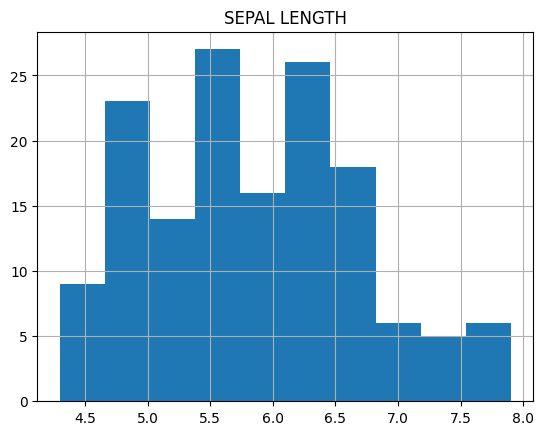

In [8]:
df["sepal_length"].hist()
plt.title("SEPAL LENGTH")

Text(0.5, 1.0, 'SEPAL WIDTH')

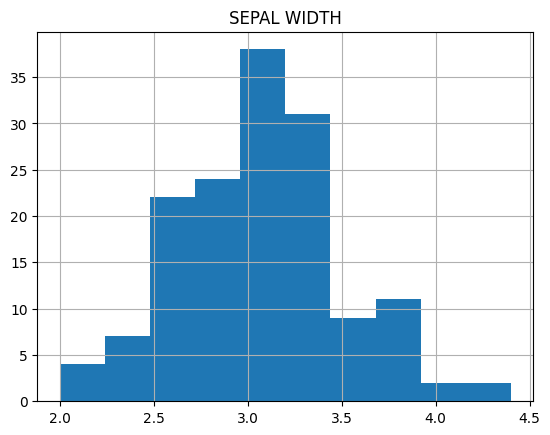

In [9]:
df["sepal_width"].hist()
plt.title("SEPAL WIDTH")

Text(0.5, 1.0, 'PETAL LENGTH')

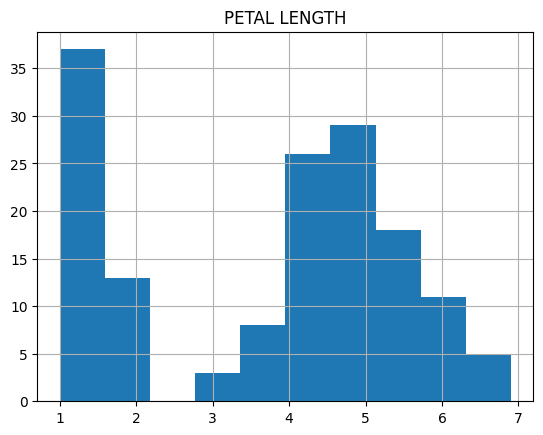

In [10]:
df["petal_length"].hist()
plt.title("PETAL LENGTH")

Text(0.5, 1.0, 'PETAL WIDTH')

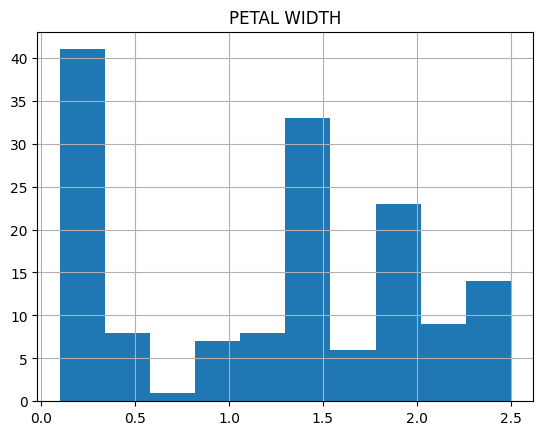

In [11]:
df["petal_width"].hist()
plt.title("PETAL WIDTH")

# SCATTERPLOT DISTRIBUTION

In [12]:
colors = ["blue","red","green"]
species = ["Iris-setosa","Iris-versicolor","Iris-virginica"]

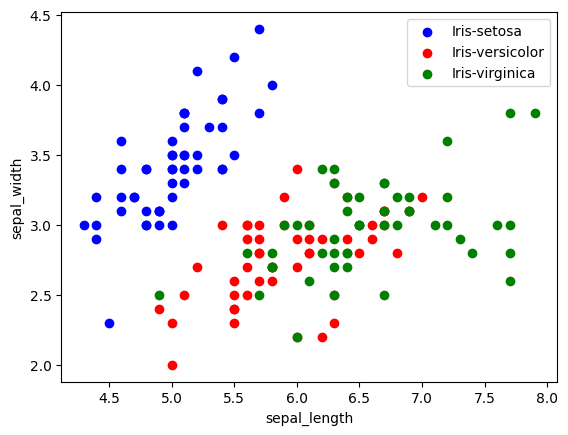

In [13]:
for i in range(3):
    x = df[df["species"]==species[i]]
    plt.scatter(x["sepal_length"],x["sepal_width"],c=colors[i],label=species[i])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()

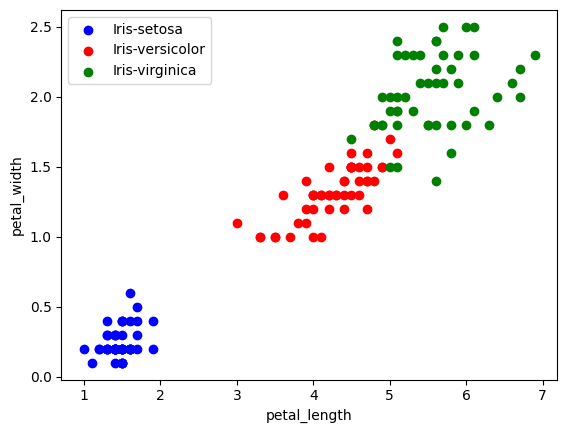

In [14]:
for i in range(3):
    x = df[df["species"]==species[i]]
    plt.scatter(x["petal_length"],x["petal_width"],c=colors[i],label=species[i])
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()

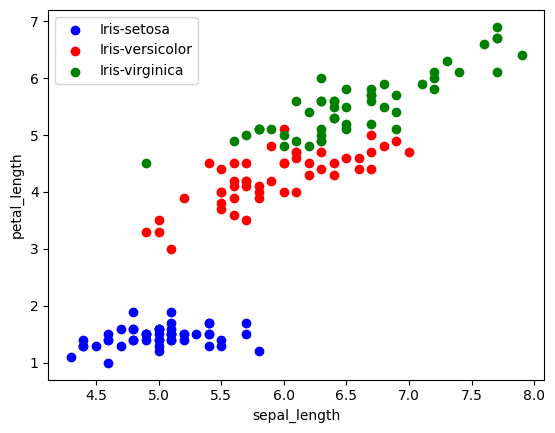

In [15]:
for i in range(3):
    x = df[df["species"]==species[i]]
    plt.scatter(x["sepal_length"],x["petal_length"],c=colors[i],label=species[i])
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()

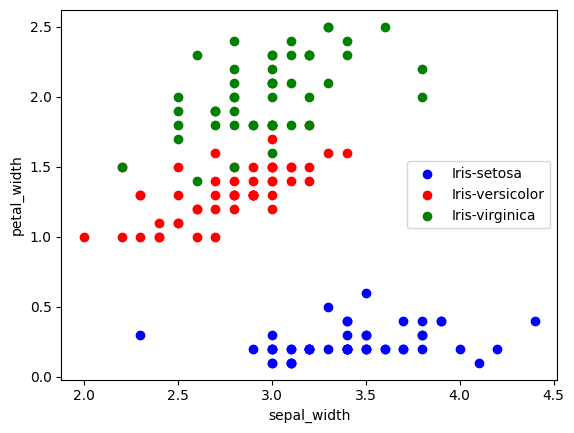

In [16]:
for i in range(3):
    x = df[df["species"]==species[i]]
    plt.scatter(x["sepal_width"],x["petal_width"],c=colors[i],label=species[i])
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.legend()

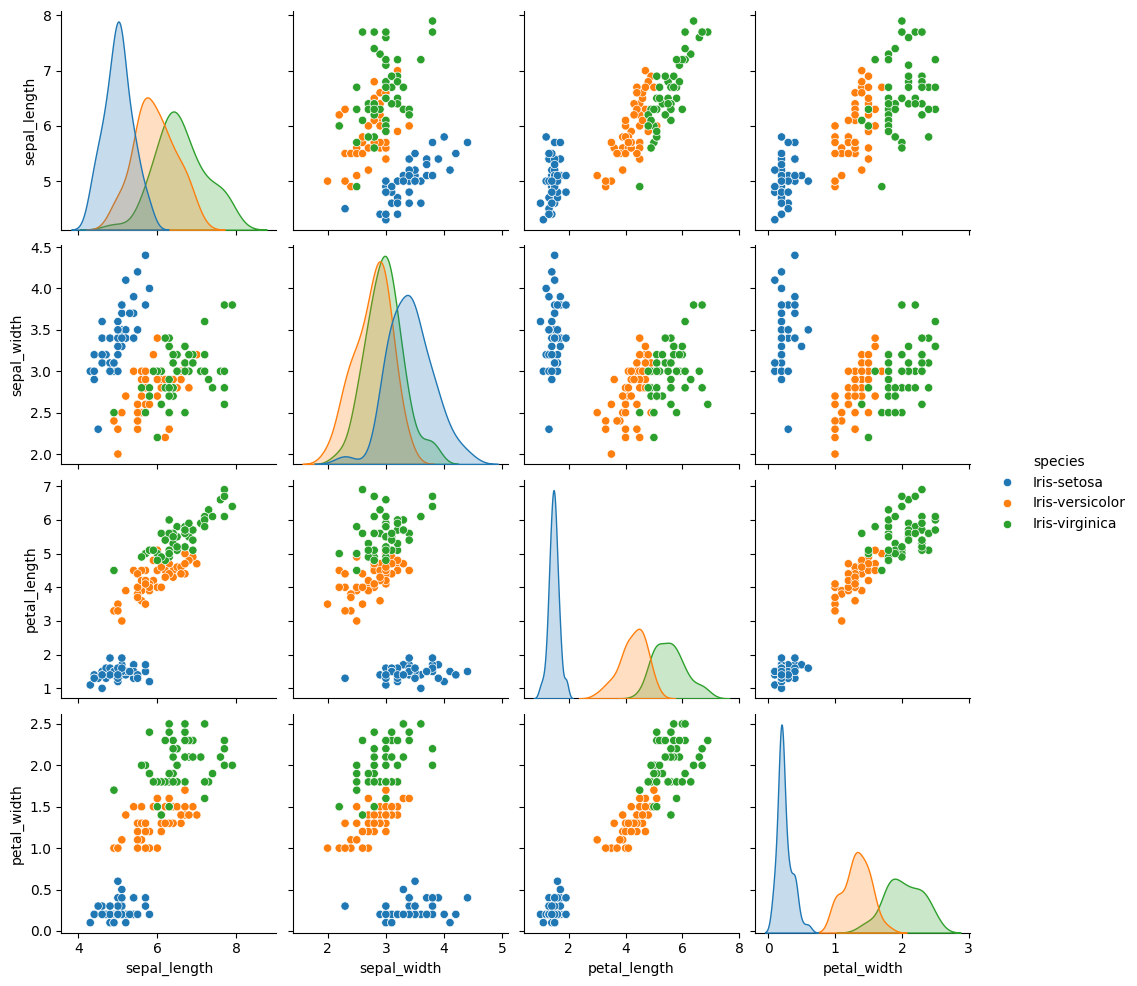

In [17]:
sns.pairplot(df,hue='species')

In [18]:
df2 = df.reindex(columns = ['sepal_length','sepal_width','petal_length','petal_width'])
df2.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# CORRELATION MATRIX

In [19]:
df2.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

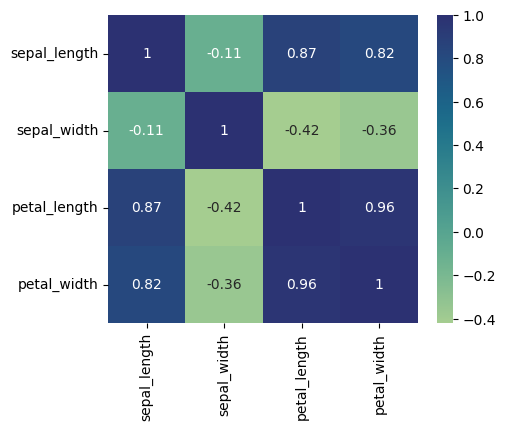

In [20]:
corr = df2.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap="crest")

In [21]:
df2.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
# Seperate features and target  
data = df.values
X = data[:,0:4]
Y = data[:,4]
column = ["sepal_length","sepal_width","petal_length","petal_width","species"]

In [32]:
# Calculate avarage of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1]) for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(column)-1)
width = 0.25

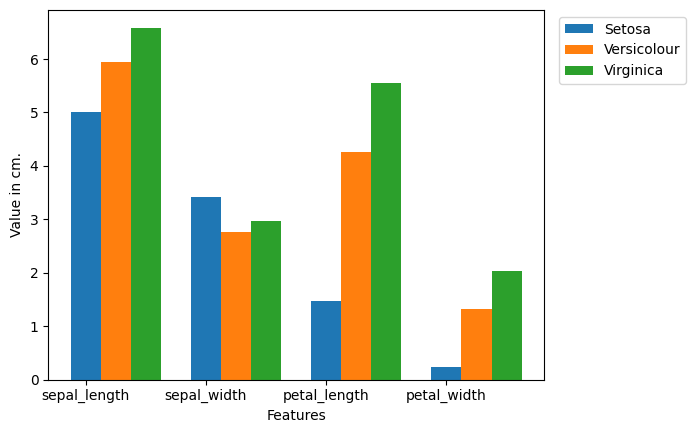

In [33]:
# Plot the avarage
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, column[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

# MODEL TRAINING

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30)

# LOGISTIC REGRESSION

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="lbfgs",max_iter=1000)

In [37]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [38]:
print("Accuracy:",model.score(X_test,Y_test)*100)

Accuracy: 100.0


# Using KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [40]:
print("Accuracy:",model.score(X_test,Y_test)*100)

Accuracy: 100.0


# Decision Tree Classification

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [42]:
print("Accuracy:",model.score(X_test,Y_test)*100)

Accuracy: 100.0


In [43]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, Y_train)

SVC()

In [44]:
# Predict from the test dataset
predictions = svn.predict(X_test)

In [45]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)

1.0

In [46]:
X_new = np.array([[3, 2, 1, 0.2], [4.9, 2.2, 3.8, 1.1], [5.3, 2.5, 4.6, 1.9]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [47]:
# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)

In [48]:
# Load the model
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)

In [49]:
model.predict(X_new)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)